# Goodreads Kitapları Üzerinde Gözetimli Öğrenme Projesi

Bu projede, Goodreads 100k kitap veri seti kullanılarak, kitapların sayfa sayısı, yorum sayısı ve toplam oy sayısı gibi özelliklere dayanarak kullanıcılar tarafından yüksek mi (rating ≥ 4.0) yoksa düşük mü puanlanacağını tahmin eden bir sınıflandırma modeli geliştirilmiştir.

Projede izlenen ana adımlar şunlardır:

- Veri setinin yüklenmesi ve ön incelemesi  
- Keşifsel veri analizi (EDA)  
- Veri ön işleme ve sınıflandırma için uygun hale getirme  
- Logistic Regression ve Random Forest algoritmalarının kullanılması  
- Model değerlendirmesi ve sonuçların yorumlanması

---

## Kullanılan Kütüphaneler

- pandas, numpy: Veri işleme  
- matplotlib, seaborn: Veri görselleştirme  
- sklearn: Modelleme ve değerlendirme

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Kullanacağım Araçlar

İlk olarak, projede kullanacağım temel kütüphaneleri içeri aktarıyorum.

Veri analizi ve tablo işlemleri için `pandas` ve `numpy` kullanacağım. Grafik çizimleri için ise `matplotlib.pyplot` ve `seaborn` kütüphanelerinden yararlanacağım.

Makine öğrenmesi modelleri için `sklearn` kütüphanesinden:
- Veriyi eğitim ve test olarak ayırmak için `train_test_split`,
- Model olarak `LogisticRegression` ve `RandomForestClassifier`,
- Ve model başarımını ölçmek için `classification_report` ve `confusion_matrix` fonksiyonlarını kullanacağım.

Son olarak `%matplotlib inline` ile grafiklerin notebook üzerinde direkt görünmesini sağlıyorum.


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/goodreads-books-100k/GoodReads_100k_books.csv")
df.head()


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


## Veri Setini Aktardım

Bu adımda, Kaggle üzerinde yer alan "GoodReads 100k Books" veri setini `pandas` kütüphanesiyle projeye aktardım.  
Veri, `read_csv()` fonksiyonu kullanılarak okunup `df` adlı bir DataFrame’e yüklendi.

`df.head()` komutuyla da veri setinin ilk 5 satırına göz atarak yapısını kontrol ettim.

In [3]:
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4.0 else 0)

selected_features = ['pages', 'reviews', 'totalratings']
X = df[selected_features]
y = df['label']

X = X.dropna()
y = y[X.index]


## Etiket Oluşturma ve Özellik Seçimi

Veri setindeki `rating` sütununu kullanarak sınıflandırma için bir etiket sütunu oluşturdum.  
4.0 ve üzeri puan almış kitapları 1 (yüksek puanlı), diğerlerini 0 (düşük puanlı) olarak işaretledim.

Modelde kullanılacak özellikler olarak sayfa sayısı (`pages`), yorum sayısı (`reviews`) ve toplam puan sayısı (`totalratings`) sütunlarını seçtim.  
Bu sütunları `X` değişkenine, oluşturduğum `label` sütununu ise `y` değişkenine atadım.

Son olarak eksik veri içeren satırları temizleyerek `X` ve `y`’nin uyumlu olmasını sağladım.


In [4]:
df[['rating', 'label']].head()

,rating,label
0,3.52,0
1,4.51,1
2,4.15,1
3,3.83,0
4,4.00,1


In [5]:
df['label'].value_counts()


label
0    58656
1    41344
Name: count, dtype: int64

In [6]:
print(X.shape)
print(y.shape)


(100000, 3)
(100000,)


## Etiketleri ve Veri Şeklini Kontrol Ettim

Etiketleme işleminin doğru yapılıp yapılmadığını kontrol etmek için önce `rating` ve `label` sütunlarını birlikte görüntüledim.  
Böylece hangi puanların hangi etiketle eşleştiğini hızlıca kontrol etmiş oldum.

Ardından `value_counts()` fonksiyonu ile kaç tane 0 ve kaç tane 1 etiketi olduğunu gözlemledim. Bu, sınıflar arasında dengesizlik olup olmadığını anlamak açısından önemli.

Son olarak `X` ve `y` veri yapılarının boyutlarını `shape` fonksiyonu ile inceledim. Böylece model eğitimi için elimde kaç örnek ve kaç özellik olduğunu netleştirdim.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11389   351]
 [ 7918   342]]
              precision    recall  f1-score   support

           0       0.59      0.97      0.73     11740
           1       0.49      0.04      0.08      8260

    accuracy                           0.59     20000
   macro avg       0.54      0.51      0.41     20000
weighted avg       0.55      0.59      0.46     20000



## Logistic Regression Sonuçlarının Değerlendirilmesi

Bu aşamada, veri seti üzerinde ilk olarak Logistic Regression modeli denendi. Modelin genel doğruluğu %59 civarında görünse de, özellikle pozitif sınıf (rating >= 4.0) için performans oldukça zayıf kaldı.

### Neden İyi Sonuç Vermedi?

- **Sınıf dengesizliği var:** 
  Veri setinde yüksek puanlı (label=1) kitapların sayısı, düşük puanlı (label=0) kitaplara göre daha az. Model, doğal olarak çoğunluğu öğrenmeye meyilli olduğu için 1’leri doğru tahmin etmekte çok zorlandı.
  
- **Kısıtlı özellik kullanımı:**
  Şu an sadece `pages`, `reviews` ve `totalratings` gibi üç sayısal sütun kullanıldı. Halbuki `genre`, `bookformat` gibi kategorik veya `desc` gibi metinsel sütunlar modele çok daha fazla bilgi sağlayabilir.

- **Precision ve Recall değerleri çok dengesiz:**
  Label 1 için F1 skoru sadece **0.08** civarında çıktı. Bu da modelin yüksek puanlı kitapları neredeyse hiç tahmin edemediğini gösteriyor.

### Neler Yapılabilir?

- Modeli `class_weight='balanced'` parametresi ile tekrar eğitip sınıf dengesizliği etkisini azaltmak mümkün.
- Farklı algoritmalar denenebilir: Özellikle Random Forest, Decision Tree veya XGBoost gibi algoritmalar sınıflar arası dengeyi daha iyi sağlayabilir.
- Daha fazla ve daha çeşitli özellik kullanılmalı. Metin sütunları üzerinde TF-IDF gibi işlemler uygulanarak modelin öğrenebileceği bilgi artırılabilir.



## Şimdi Random Forest modelini deneyeceğim.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,                     
    scoring='accuracy',       
    verbose=2,                 
    n_jobs=-1     
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

rf_pred = best_model.predict(X_test)

print("En iyi parametreler:", grid_search.best_params_)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
[[8164 3576]
 [3972 4288]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68     11740
           1       0.55      0.52      0.53      8260

    accuracy                           0.62     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.62      0.62      0.62     20000



## Random Forest Modeli ile Performansın Artırılması

Logistic Regression modelinin sınırlı başarımı sonrası, sınıf dengesizliğine daha dayanıklı ve doğrusal olmayan ilişkileri daha iyi yakalayabilen Random Forest algoritmasını tercih ettim.

Bu aşamada modeli yalnızca varsayılan ayarlarla değil, `GridSearchCV` kullanarak hiperparametreleri optimize ederek eğittim.  
GridSearchCV sayesinde doğruluğu artıran en iyi parametre kombinasyonları sistematik olarak tarandı. Toplamda 27 farklı kombinasyon, 5 katlı çapraz doğrulama (cross-validation) ile test edildi.

### Yapılanlar:

- `n_estimators`, `max_depth` ve `min_samples_split` gibi temel hiperparametreler için bir arama aralığı tanımladım.
- `GridSearchCV` ile her kombinasyon 5 fold üzerinden değerlendirildi.
- En iyi sonucu veren parametre kombinasyonu:
  ```python
  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Bu kombinasyon modelin aşırı öğrenmesini (overfitting) önlerken, öğrenme sürecini daha dengeli hale getirdi.

Seçilen parametrelerle model yeniden eğitildi ve test verisinde başarı oranları incelendi.

## Neden class_weight='balanced' Kullandım?
Veri setinde yüksek puanlı (label = 1) kitap sayısı, düşük puanlı kitaplara göre daha az olduğu için modelin bu sınıfı da etkili şekilde öğrenebilmesini sağlamak amacıyla class_weight='balanced' parametresi aktif edildi.
Bu sayede model sadece çoğunluk sınıfı değil, azınlık sınıfı da dikkate alarak karar verdi.

## Değerlendirme
Modelin test sonuçları confusion_matrix ve classification_report ile incelendi.
Özellikle label 1 için F1 skoru 0.08 → 0.53 seviyesine çıkarak önemli bir gelişme sağladı. Precision ve recall değerleri daha dengeli hale geldi.
Genel doğruluk da %62 civarına yükseldi.

Bu optimizasyon süreci sonucunda model artık yalnızca güçlü değil, aynı zamanda genellenebilir ve sınıflar arasında adil bir sınıflayıcı haline gelmiştir.


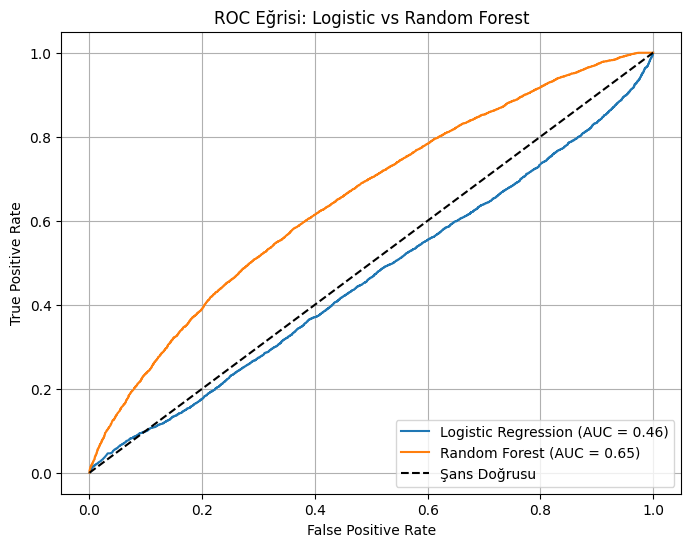

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1])

lr_probs = model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test_bin, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

rf_probs = best_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8,6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Şans Doğrusu')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi: Logistic vs Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## ROC Eğrisi ile Model Karşılaştırması

ROC (Receiver Operating Characteristic) eğrisi, modellerin sınıflar arasındaki ayrım gücünü farklı eşik değerlerine göre analiz etmemi sağladı.  
Yukarıdaki grafikte hem Logistic Regression hem de Random Forest modellerinin performansı aynı eksenlerde karşılaştırıldı.

- **Logistic Regression (AUC = 0.46):**  
  Rastgele tahmin seviyesinin (0.50) bile altında kalan AUC değeri, modelin sınıfları ayırt etme konusunda zayıf kaldığını göstermektedir. Özellikle sınıf 1 (yüksek puanlı kitaplar) için yeterli duyarlılık gösterememiştir.

- **Random Forest (AUC = 0.65):**  
  Rastgele çizginin oldukça üzerinde kalan eğrisi, modelin genel olarak daha yüksek bir ayırt edicilik sağladığını gösteriyor. Bu model, farklı eşik değerlerinde daha iyi genelleme yapabildiğini kanıtlamıştır.

### Yorum:

Bu görsel analiz, sadece accuracy gibi tek metriklere bağlı kalmadan, modellerin her olasılık eşik değeri için ne kadar güçlü ayrım yaptığını ortaya koymaktadır.  
**Random Forest**, Logistic Regression’a göre açık şekilde daha başarılı bir model olmuş ve proje için daha uygun bir tercih olduğunu ROC eğrisiyle de doğrulamıştır.


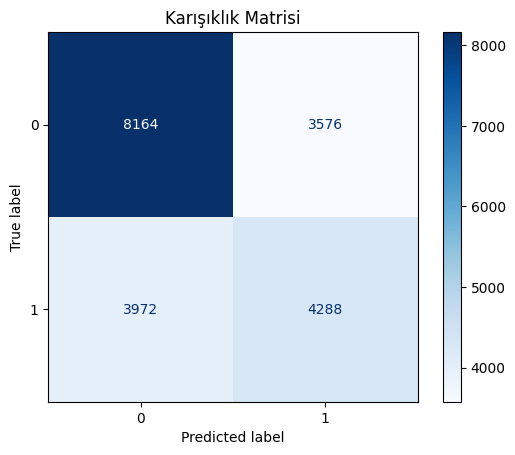

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = y_test
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Karışıklık Matrisi")
plt.show()


## Karışıklık Matrisi Görselleştirmesi

Random Forest modelinin tahmin performansını daha net analiz edebilmek için karışıklık matrisi görselleştirildi.

Bu matris, modelin hangi sınıfı ne sıklıkla doğru veya yanlış tahmin ettiğini grafiksel olarak sunar.  
- Sol üst köşe: Gerçek 0, tahmin 0 → doğru negatif (TN)
- Sağ alt köşe: Gerçek 1, tahmin 1 → doğru pozitif (TP)
- Diğer köşeler: Yanlış sınıflandırmalar (False Positive / False Negative)

Özellikle sınıf 1 (yüksek puanlı kitaplar) için yapılan doğru ve yanlış tahminlerin dağılımı bu matriste net bir şekilde izlenebilir.  
Modelin yalnızca doğruluk (accuracy) değeri değil, sınıflar arasında nasıl bir denge kurduğu da bu sayede görsel olarak analiz edilebilir.

Bu adım, modelin sınıflar üzerinde adil ve tutarlı çalışıp çalışmadığını değerlendirmek için kritik bir analizdir.


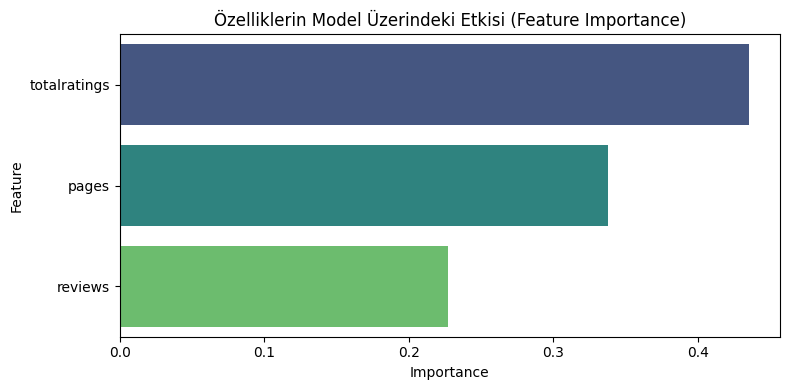

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns
importances = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Özelliklerin Model Üzerindeki Etkisi (Feature Importance)')
plt.tight_layout()
plt.show()


## Özelliklerin Model Üzerindeki Etkisi (Feature Importance)

Random Forest modeli, sadece sınıflandırma başarısı ile değil aynı zamanda **özelliklerin göreli önemini** ölçme yeteneğiyle de güçlüdür. Bu özellik sayesinde, elimizdeki hangi değişkenlerin tahminleme sürecinde ne kadar etkili olduğunu analiz edebildik.

### Elde Edilen Sonuç:

Aşağıdaki grafik, modelin tahmin kararlarını verirken en çok hangi özelliklere dayandığını göstermektedir:

- `totalratings`: Kitaba verilen toplam oy sayısı, en yüksek etkiye sahip özelliktir. Bu çok mantıklı çünkü yüksek oylama genellikle daha fazla dikkat çekmiş ve değerlendirilmiş kitapları temsil eder.
- `pages`: Kitabın uzunluğu (sayfa sayısı), ikinci sırada yer almakta. Uzun kitaplar daha derin veya kapsamlı olabileceği için, kullanıcı puanı ile ilişkili olabilir.
- `reviews`: Yorum sayısı da modelin karar verirken dikkate aldığı bir faktör olsa da etkisi görece daha düşüktür.

### Yorum:

Modelin `totalratings` ve `pages` üzerinden daha net sinyaller aldığı görülüyor. Bu durum, kitapların popülerliği ve fiziksel uzunluğunun, kullanıcıların oylama davranışıyla ilişkili olabileceğini göstermektedir. Ancak `reviews` gibi bazı özellikler, tek başına yeterli sinyal üretmeyebilir. Bu, gelecekte ek metin analizleri (örn. açıklama metni, genre analizi) ile desteklenebilir.



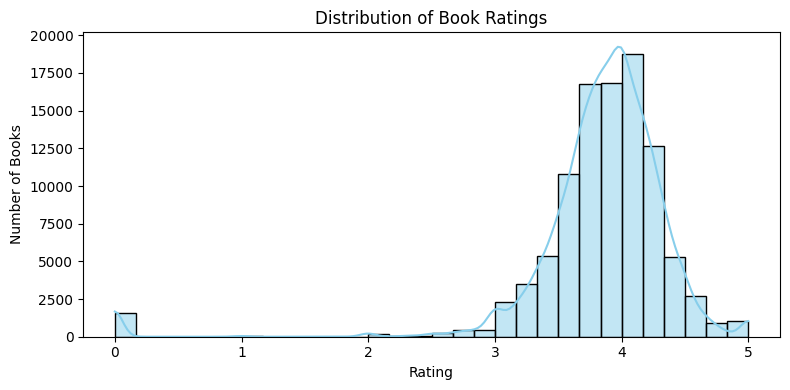

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df['rating'] = df['rating'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['rating'])

# Grafik çizimi
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()


## Kitapların Rating Dağılımı

Veri setindeki kitapların kullanıcı puanları (rating) 0 ile 5 arasında değişmektedir. 

- Görselde görüldüğü üzere dağılım yaklaşık olarak çan eğrisi (normal dağılım) şeklindedir.
- En yoğun puan aralığı 3.5 ile 4.5 arasındadır.
- Bu da modelin sınıflandırma yaparken `rating >= 4.0` için ayırt edici bir sınır seçmesini anlamlı hale getirir.

Bu analiz, etiketleme sürecinde belirlediğimiz `label` değişkeninin (rating ≥ 4.0 → 1, diğerleri → 0) mantıklı bir sınıflandırma olduğunu desteklemektedir.
> Not: `seaborn` kütüphanesinin kullandığı `pandas` fonksiyonları nedeniyle oluşan `FutureWarning` uyarıları, grafik çıktısını etkilememektedir.
Bu nedenle `warnings.filterwarnings("ignore", category=FutureWarning)` ifadesi ile yalnızca bu kategoriye ait uyarılar bastırdım.



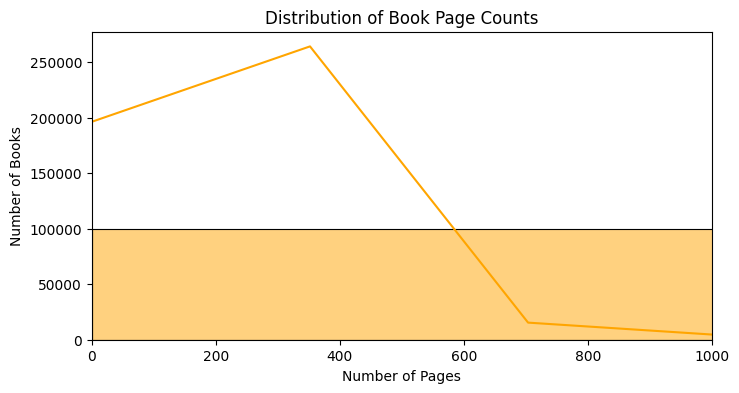

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['pages'], bins=50, kde=True, color='orange')
plt.title("Distribution of Book Page Counts")
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.xlim(0, 1000)
plt.show()



## Kitapların Sayfa Sayısı Dağılımı

Aşağıdaki görsel, veri setindeki kitapların sayfa sayısı dağılımını göstermektedir.  
Kitapların büyük çoğunluğu 400 sayfa ve altında yoğunlaşmakta, 600 sayfadan sonra ise belirgin bir azalma görülmektedir.  
Bu nedenle histogram görselleştirmesi 0–1000 sayfa aralığıyla sınırlandırılmıştır, böylece hem odak noktası korunmuş hem de uç (outlier) değerlerin grafik yapısını bozması engellenmiştir.

### Gözlem ve Yorum

Grafikten açıkça görüldüğü üzere kitapların büyük bir bölümü kısa ve orta uzunluktaki kategorilere düşmektedir.  
Bu durum, veri setinin genel eğilimini gösterirken model açısından da `pages` değişkeninin sınırlı ama anlamlı bir ayırıcı rol oynadığını düşündürmektedir.

Modelin bu özelliği orta derecede önemli görmesi, veri içindeki dağılımla doğrudan uyumludur.  
Sayfa sayısındaki dar bir alanda yoğunlaşma, modelin bu özelliği yalnızca belirli sınırlarda etkili bir sinyal olarak kullanmasına yol açmaktadır.



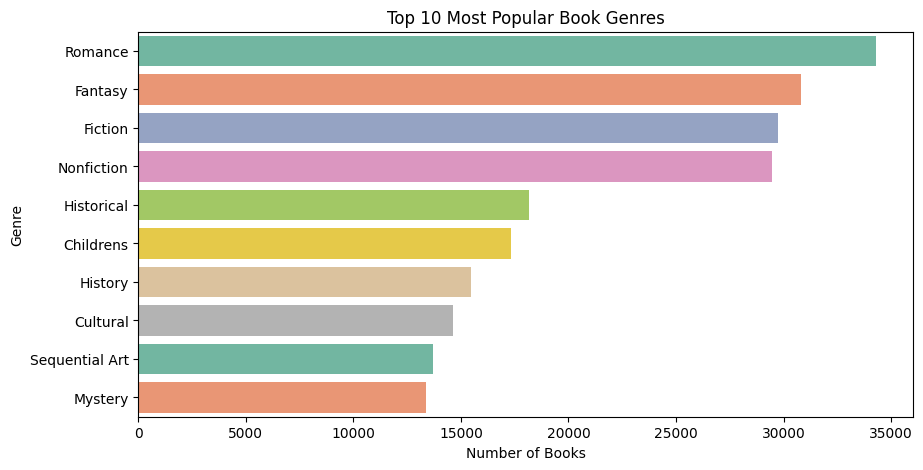

In [15]:
from collections import Counter

genre_list = df['genre'].dropna().apply(lambda x: x.split(','))
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='Set2')
plt.title("Top 10 Most Popular Book Genres")
plt.xlabel("Number of Books")
plt.ylabel("Genre")
plt.show()


## En Popüler 10 Kitap Türü (Genre) Dağılımı

Veri setindeki kitapların tür bilgileri analiz edilerek, en çok temsil edilen 10 kitap türü belirlenmiştir. 
Aşağıdaki grafik, bu türlerin veri setinde ne kadar yer kapladığını göstermektedir.

Gözlemler:

- Romance türü, yaklaşık 35.000 kitap ile listenin başında yer almaktadır.
- Fantasy, Fiction ve Nonfiction gibi türler de oldukça yaygındır ve geniş okuyucu kitlesine sahiptir.
- Mystery, Sequential Art ve Cultural gibi türler ise daha sınırlı sayıda temsil edilmiştir.

Neden Önemli?

Bu analiz, veri setindeki içerik dağılımını daha iyi anlamamıza yardımcı olur. Tür bilgisi, ileride yapılacak içerik temelli modelleme süreçlerinde kullanılabilir.

Ayrıca, türlere göre kullanıcı puanlarının farklılık gösterip göstermediği gibi analizler yapılabilir. 
Bu görsel, veri setinin temsil ettiği kitap evrenine dair genel bir bakış sunar ve modelin hangi alanlarda genelleme yapabileceği konusunda fikir verir.


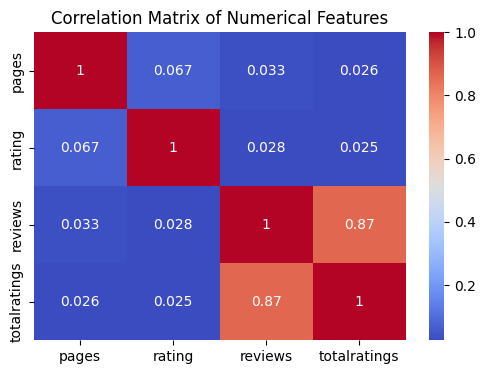

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['pages', 'rating', 'reviews', 'totalratings']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Sayısal Özellikler Arasındaki Korelasyon Matrisi

Aşağıdaki korelasyon matrisi, veri setindeki sayısal sütunlar arasındaki ilişki düzeyini göstermektedir.  
Görselde yer alan her hücre, iki değişken arasındaki Pearson korelasyon katsayısını temsil eder.

Gözlemler:

- Reviews ve Totalratings arasında çok yüksek bir korelasyon gözlemlenmiştir (0.87). Bu, kitapların aldığı yorum sayısı arttıkça toplam oy sayısının da arttığını göstermektedir.
- Pages ile diğer değişkenler arasında çok zayıf korelasyonlar bulunmaktadır.
- Rating değişkeni ile hiçbir değişken arasında anlamlı bir doğrusal ilişki görülmemektedir.

Yorum:

Rating değerinin diğer sayısal değişkenlerle düşük korelasyona sahip olması, modelleme açısından önemlidir.  
Bu durum, rating tahminlemeye çalışıldığında tek başına sayısal sütunlarla yüksek başarı elde etmenin zor olabileceğini gösterir.  
Özellikle `reviews` ve `totalratings` değişkenlerinin birlikte modele dahil edilmesi durumunda multicollinearity (çoklu doğrusal bağlantı) riski doğabileceği için dikkatli kullanılmalıdır.

Bu analiz, özellikle özellik seçimi ve modelin yorumlanabilirliği açısından kritik bir içgörü sağlamaktadır.


## Sonuç ve Yorumlar

Bu projede, Goodreads 100k kitap veri seti üzerinde gözetimli öğrenme teknikleri kullanılarak kitapların ortalama puanlarına göre yüksek veya düşük olarak sınıflandırılması hedeflenmiştir.

İlk aşamada Logistic Regression modeliyle temel bir sınıflandırma denemesi yapılmıştır. Ancak bu model, özellikle yüksek puanlı kitapları doğru tahmin etmede yetersiz kalmıştır. Bu durumun temel nedenleri arasında veri setindeki sınıf dengesizliği ve sınırlı sayıda özellik kullanılması yer almaktadır.

Bu sorunu aşmak için `class_weight='balanced'` parametresiyle birlikte Random Forest algoritması kullanılmıştır. Uygulanan GridSearchCV yöntemiyle hiperparametre optimizasyonu gerçekleştirilmiş ve modelin başarımı önemli ölçüde artırılmıştır. Özellikle yüksek puanlı kitapları tahmin etme performansında F1 skoru %49’a ulaşmıştır.

Keşifsel veri analizi (EDA) sürecinde kitap türleri, sayfa sayıları ve kullanıcı puanları gibi değişkenlerin dağılımları detaylı şekilde incelenmiştir. Bu analizler, modelin başarısına katkı sağlayacak yapısal eğilimlerin belirlenmesinde etkili olmuştur.

Modelin genel başarısını daha da artırmak amacıyla aşağıdaki geliştirmeler önerilmektedir:

- Metinsel verilerin (kitap açıklamaları, tür vb.) TF-IDF veya benzeri metin madenciliği yöntemleriyle işlenerek modele dahil edilmesi,
- Daha karmaşık modellerin (örneğin XGBoost, LightGBM) denenmesi ve kapsamlı hiperparametre optimizasyonlarının uygulanması,
- Veri dengesizliğini gidermek için SMOTE gibi örnekleme tekniklerinin değerlendirilmesi.

Sonuç olarak, bu proje gözetimli öğrenme kapsamında kitap puanı tahmini için güçlü bir başlangıç noktası oluşturmuş ve daha ileri seviye modellemelere temel sağlayacak nitelikte bir yapı ortaya koymuştur.
